# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
from IPython.display import display
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import pymysql

# Connect to local DB
# driver   = 'mysql+pymysql:'
# user     = 'root' 
# password = 'ML_LI_04'
# ip       = '127.0.0.1' 


# Connect to Ironhack DB
driver   = 'mysql+pymysql:'
user     = 'data-students' 
password = 'iR0nH@cK-D4T4B4S3'
ip       = '34.65.10.136' 
 

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

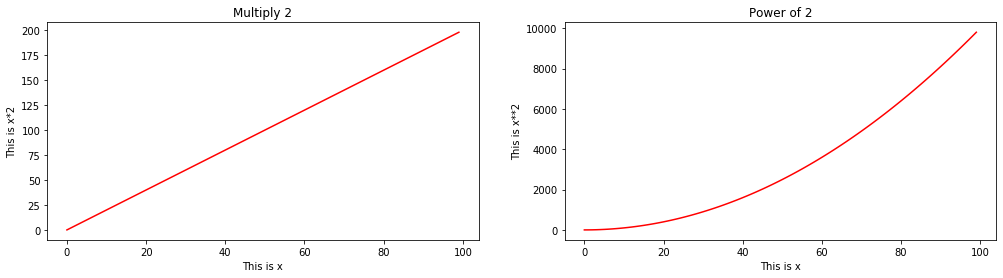

In [3]:
# Method 1
plt.figure(figsize=(17, 4))
plt.subplot(1,2,1)
plt.plot(x, y, color='red')
plt.xlabel('This is x')
plt.ylabel('This is x*2')
plt.title('Multiply 2')
plt.subplot(1,2,2)
plt.plot(x, z, color='red')
plt.xlabel('This is x')
plt.ylabel('This is x**2')
plt.title('Power of 2')
plt.show()

Use plt.subplots(nrows=1, ncols=2) to create the plot.

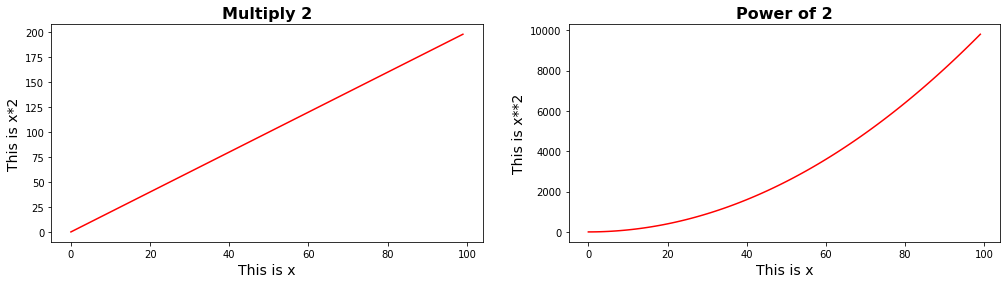

In [4]:
# Method 2
fig, ax = plt.subplots(1 , 2, figsize = (17,4))
ax[0].plot(x, y, color='red')
ax[0].set_xlabel('This is x', fontsize = 14)
ax[0].set_ylabel('This is x*2', fontsize = 14)
ax[0].set_title('Multiply 2', fontsize = 16, fontweight = 'bold')
ax[1].plot(x, z, color='red')
ax[1].set_xlabel('This is x', fontsize = 14)
ax[1].set_ylabel('This is x**2', fontsize = 14)
ax[1].set_title('Power of 2', fontsize = 16, fontweight = 'bold')
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

In [5]:
# your code here
## Done above

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

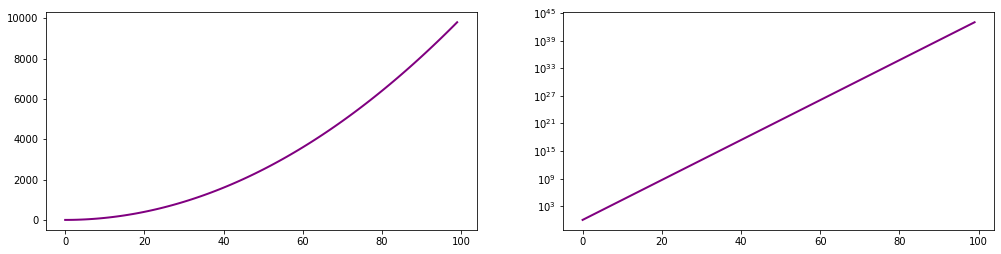

In [6]:
# your code here
x = np.arange(0,100)
y1 = x**2
y2 = np.exp(x)
fig, ax = plt.subplots(1 , 2, figsize = (17,4))
ax[0].plot(x, y1, color = 'purple', label='2 power', linewidth=2)
ax[1].plot(x, y2, color = 'purple', label='Log power', linewidth=2)
ax[1].set_yscale('log')
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

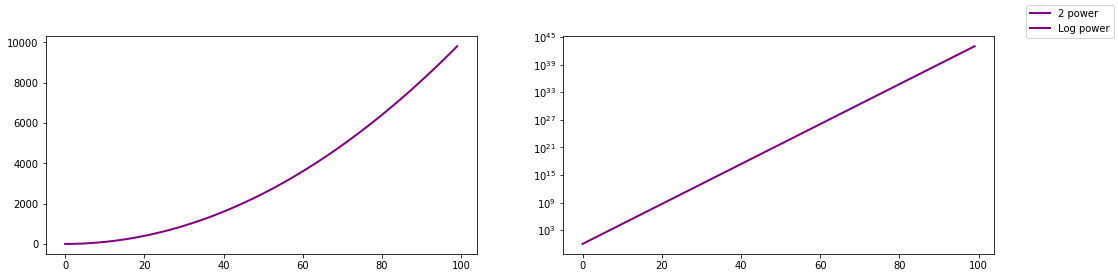

In [7]:
# your code here
x = np.arange(0,100)
y1 = x**2
y2 = np.exp(x)
fig, ax = plt.subplots(1 , 2, figsize = (17,4))
ax[0].plot(x, y1, color = 'purple', label='2 power', linewidth=2)
ax[1].plot(x, y2, color = 'purple', label='Log power', linewidth=2)
ax[1].set_yscale('log')
fig.legend()
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here
database = 'fitbit' 

connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

# Import table content
fitbit = pd.read_sql('SELECT * FROM fitbit2;', engine)
pd.set_option('display.max_columns', None)
fitbit.head(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.40389115,Friday,4,1,6.4,92.0863309353,0,0,May,5
1,2015-05-09,3631,18925,14.11,4,611,316,61,60,2248,454,35,21,491,8.76754481,Saturday,5,0,7.56666666667,92.4643584521,6.4,92.0863309353,May,5
2,2015-05-10,3204,14228,10.57,1,602,226,14,77,1719,387,46,25,436,6.56789147,Sunday,6,0,6.45,88.7614678899,7.56666666667,92.4643584521,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

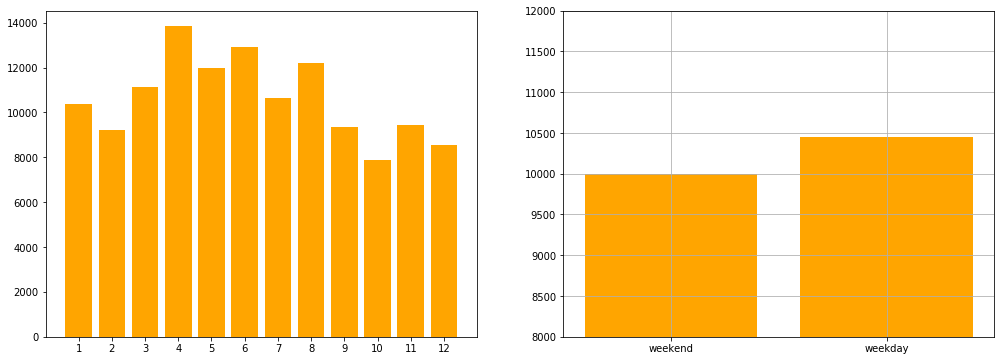

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
steps_by_month = fitbit[['Steps', 'Months_encoded']].copy()
steps_by_month = steps_by_month.groupby('Months_encoded', as_index = False).median()
steps_by_month.columns = ['month_number', 'steps_median']
month = steps_by_month.month_number
steps_month = steps_by_month.steps_median

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
steps_by_weekday = fitbit[['Steps', 'Work_or_Weekend']].copy()
steps_by_weekday = steps_by_weekday.groupby(fitbit.Work_or_Weekend, as_index = False).median()
steps_by_weekday.columns = ['steps_median', 'day_type']
steps_by_weekday.loc[(steps_by_weekday['day_type'] == 0.0), 'day_type'] = 'weekend'
steps_by_weekday.loc[(steps_by_weekday['day_type'] == 1.0), 'day_type'] = 'weekday'
day = steps_by_weekday.day_type
steps_day = steps_by_weekday.steps_median


fig, ax = plt.subplots(1 , 2, figsize = (17,6))
ax[0].bar(month, steps_month, color = 'orange', label='steps per month')
# ax[0].set_xticks(np.arange(1, 13, 1)) 
ax[1].bar(day, steps_day, color = 'orange', label='steps per weekday')
plt.sca(ax[0])
plt.xticks(np.arange(1, 13, 1)) 
plt.sca(ax[1])
plt.axis([-.5, 1.5, 8000, 12000])
plt.grid()
plt.show()

### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [10]:
fitbit.dtypes

Date                          object
Calorie burned                 int64
Steps                          int64
Distance                      object
Floors                         int64
Minutes Sedentary             object
Minutes Lightly Active         int64
Minutes Fairly Active          int64
Minutes Very Active            int64
Activity Calories              int64
MinutesOfSleep                 int64
MinutesOfBeingAwake            int64
NumberOfAwakings               int64
LengthOfRestInMinutes          int64
Distance_miles                object
Days                          object
Days_encoded                   int64
Work_or_Weekend                int64
Hours Sleep                   object
Sleep efficiency              object
Yesterday_sleep               object
Yesterday_sleep_efficiency    object
Months                        object
Months_encoded                 int64
dtype: object

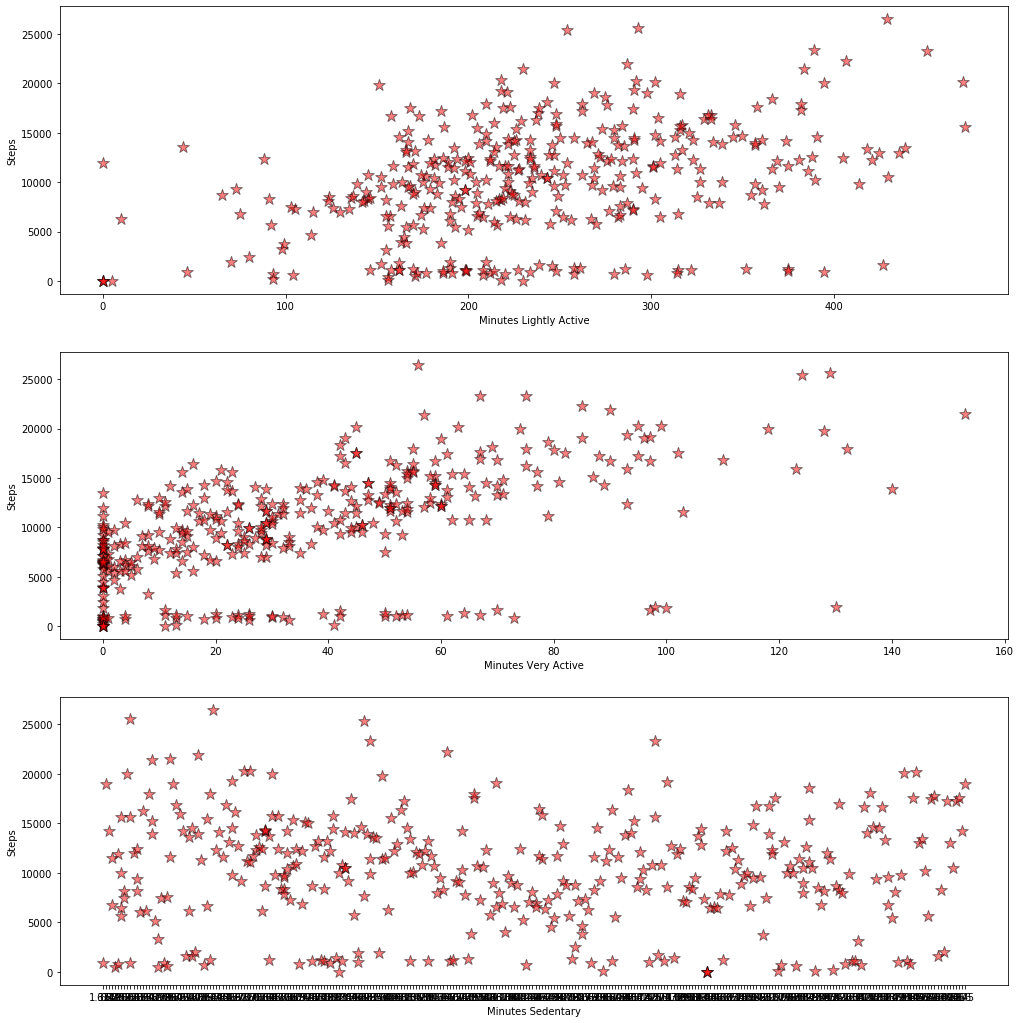

In [11]:
# # your code here
# plt.figure(figsize=(17,12))
# features = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
# for i in features:
#     position = features.index(i) + 1
#     plt.subplot(3,1,position)
#     plt.scatter(fitbit[i], fitbit['Steps'], s = 150, color='red', edgecolor='black', alpha=0.5, marker='*')
#     plt.xlabel(i)
#     plt.ylabel('Steps')
# plt.show()


# your code here -- with ZIP function!
fig, ax = plt.subplots(3, 1, figsize = (17,18))
features = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
for i,j in zip(features, ax):
    j.scatter(fitbit[i], fitbit['Steps'], s = 150, color='red', edgecolor='black', alpha=0.5, marker='*')
    j.set_xlabel(i)
    j.set_ylabel('Steps')
#     j.set_xticks(np.arange(fitbit[i].min(), fitbit[i].max(), 50) This will work if the column was a number type, but for 'Minutes Sedentary'
                                                    # the type is object and it does not calculate well.
plt.show()
    

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [12]:
# your code here
database2 = 'titanic' 

connection_string2 = f'{driver}//{user}:{password}@{ip}/{database2}'
engine2 = create_engine(connection_string2)

# Import table content
titanic = pd.read_sql('SELECT * FROM titanic;', engine2)

#### Explore the titanic dataset using Pandas dtypes.

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=['float64'])
##Note: Survived is actually a categorical variable, though by using the select_dtypes method it was not possible to separate
##from the other float variables, which are actually numerical. However, Survived should be considered a categorical variable
##(boolean)

,Survived,Age,Fare
0,0.0,22.000000,7.2500
1,1.0,38.000000,71.2833
2,1.0,26.000000,7.9250
3,1.0,35.000000,53.1000
4,0.0,35.000000,8.0500
...,...,...,...
1304,NaN,29.513190,8.0500
1305,NaN,39.000000,108.9000
1306,NaN,38.500000,7.2500
1307,NaN,29.513190,8.0500


In [15]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=['object', 'int64'])

,PassengerId,Pclass,Name,Gender,SibSp,Parch,Ticket,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,U0,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,U0,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C123,S
4,5,3,"Allen, Mr. William Henry",male,0,0,373450,U0,S
...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,U0,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,U0,S
1307,1308,3,"Ware, Mr. Frederick",male,0,0,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [16]:
# your code here
plt.figure(figsize=(12, 6))
plt.style.use('classic')

<Figure size 864x432 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

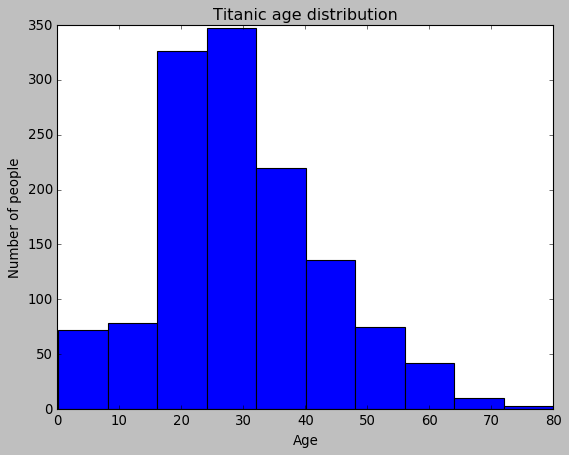

In [17]:
# your code here
plt.hist(titanic['Age'], color='blue')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Titanic age distribution')
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

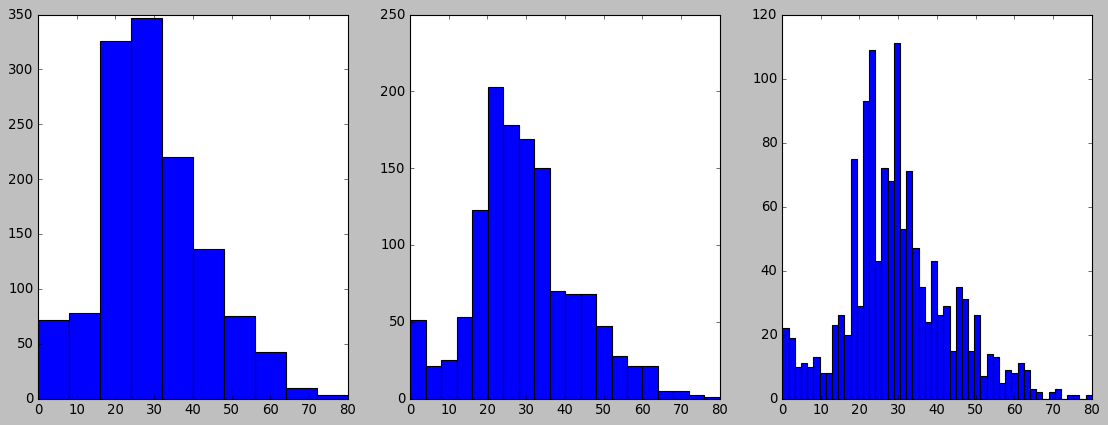

In [18]:
# your code here
fig, ax = plt.subplots(1 , 3, figsize = (17,6))
ax[0].hist(titanic['Age'], bins = 10, color = 'blue', label='10 bins')
ax[1].hist(titanic['Age'], bins = 20, color = 'blue', label='20 bins')
ax[2].hist(titanic['Age'], bins = 50, color = 'blue', label='50 bins')
plt.show()


#### How does the bin size affect your plot?

In [19]:
"""
The frequency per bin is smaller, and there is more granularity of the data. 
"""

'\nThe frequency per bin is smaller, and there is more granularity of the data. \n'

#### Use seaborn to show the distribution of column `Age`.

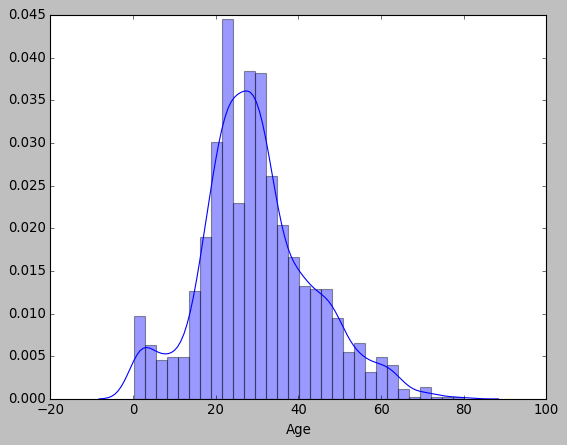

In [20]:
# your code here
x = titanic.Age
sns.distplot(x)
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

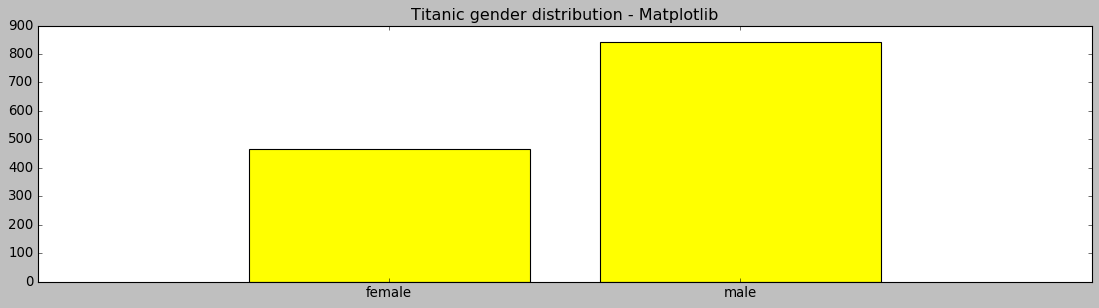

In [21]:
# Method 1 - matplotlib
# your code here

titanic_gender = titanic[['Name', 'Gender']]
titanic_gender = titanic_gender.groupby('Gender', as_index = False).count()
titanic_gender.columns = ['Gender','Number']
titanic_gender
x = titanic_gender.Gender
y = titanic_gender.Number
plt.figure(figsize=(17, 4))
plt.bar(x, y, color='yellow') 
plt.axis([-1, 2, 0, 900])
plt.title('Titanic gender distribution - Matplotlib')
plt.show()

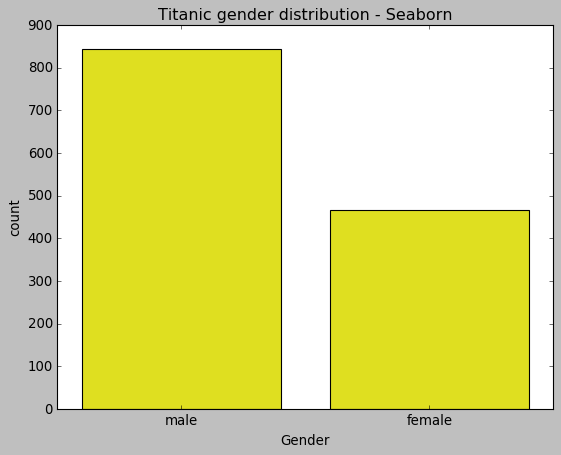

In [22]:
# Method 2 - seaborn
# your code here
sns.countplot(x='Gender', data=titanic, color='yellow')
plt.title('Titanic gender distribution - Seaborn')
plt.show()

#### Use the right plot to visualize the column `Pclass`.

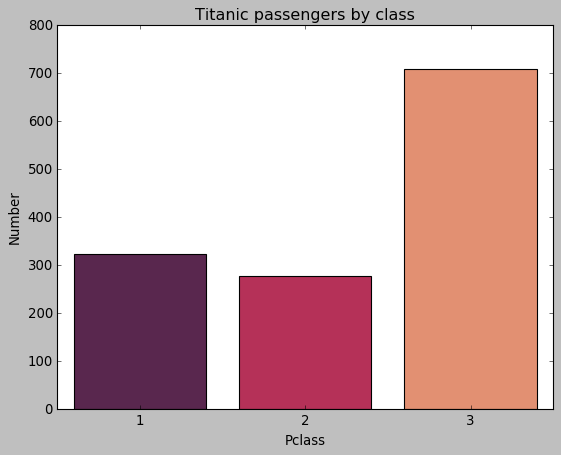

In [23]:
# your code here
titanic.Pclass = titanic.Pclass.astype('int32')
titanic_class = titanic[['Name', 'Pclass']]
titanic_class = titanic_class.groupby('Pclass', as_index = False).count()
titanic_class.columns = ['Pclass','Number']
j = titanic_class.Pclass
k = titanic_class.Number
sns.barplot(x=j, y=k, palette="rocket")
plt.title('Titanic passengers by class')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

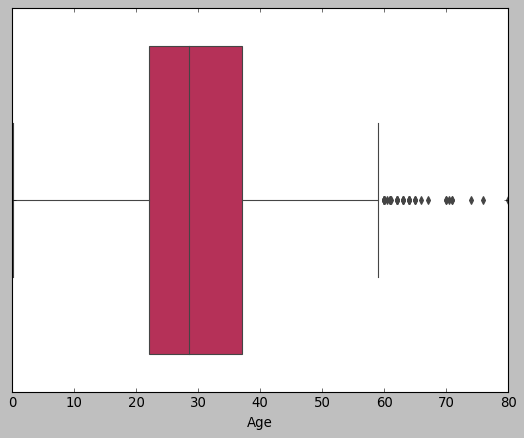

In [25]:
# your code here
sns.boxplot(x="Age", data=titanic, palette="rocket")
plt.show()

#### What does the last plot tell you about the feature `Age`?

In [26]:
"""
The age mean sligtly below 30, though the deviation was relatively high. We can see that the 1Q is a bit above 20 and the 3Q
a bit under 40, meaning that the main age range could be placed in between the 20 and 40 years old. Morevoer, several outlayers
can be appreciated in the high end of the distribution (+60).
"""

'\nThe age mean sligtly below 30, though the deviation was relatively high. We can see that the 1Q is a bit above 20 and the 3Q\na bit under 40, meaning that the main age range could be placed in between the 20 and 40 years old. Morevoer, several outlayers\ncan be appreciated in the high end of the distribution (+60).\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

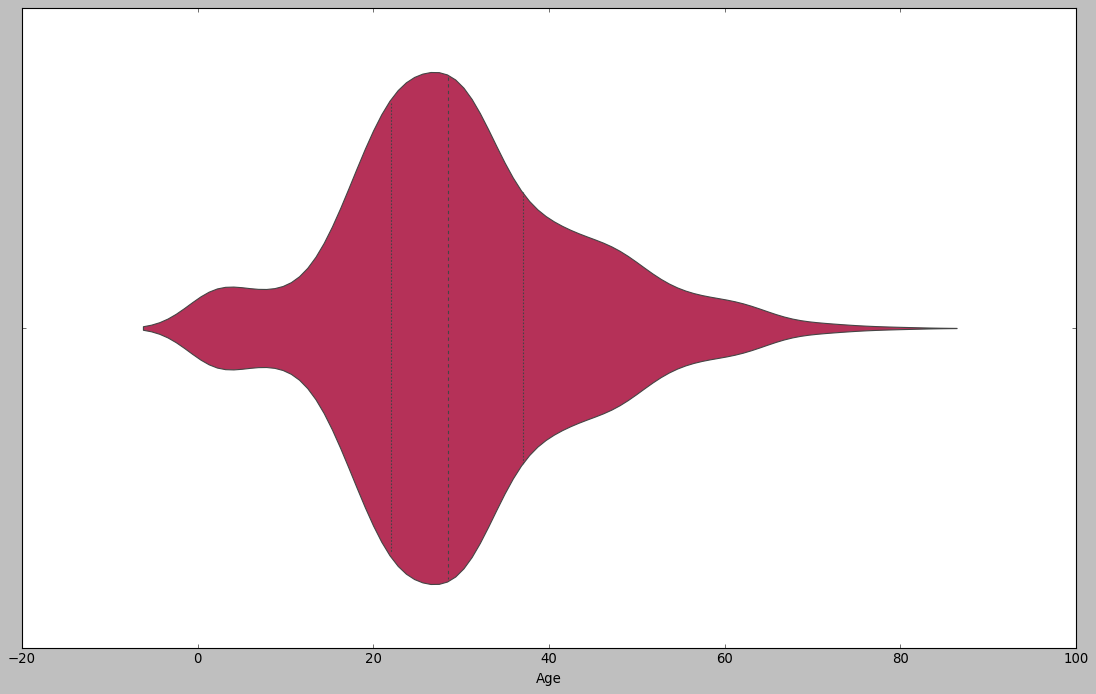

In [27]:
# your code here
plt.figure(figsize=(17,10))
sns.violinplot(x=titanic.Age,  palette="rocket", inner="quartile")
plt.show()


#### What additional information does the last plot provide about feature `Age`?

In [36]:
"""
Aside from the categorical information provided by the boxplot, this plot also provides an easy visualization of the 
variable distribution.
"""

'\nAside from the categorical information provided by the boxplot, this plot also provides an easy visualization of the \nvariable distribution.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [29]:
titanic_age_fare = titanic[['Age', 'Fare']].copy()
titanic_age_fare
x=titanic.Fare
y=titanic.Age

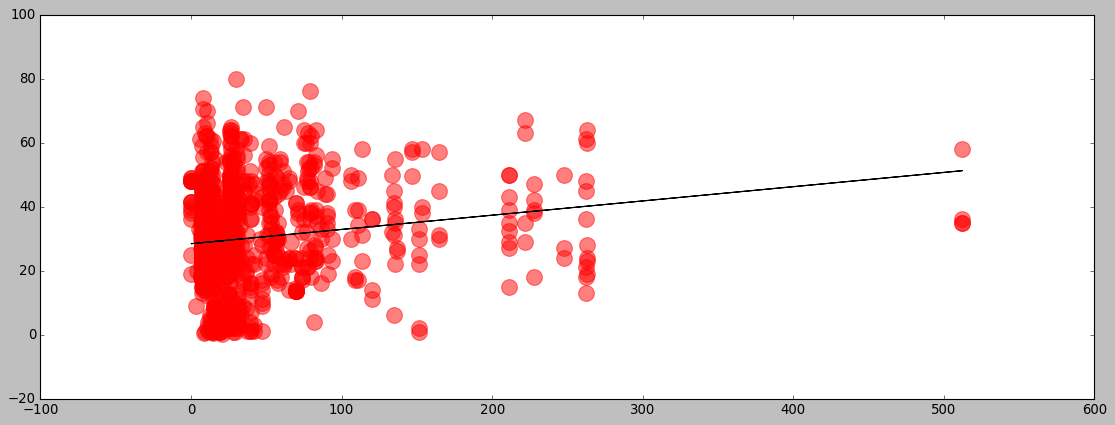

In [30]:
# Method 1 - matplotlib
# your code here
m, b = np.polyfit(x, y, 1)
plt.figure(figsize=(17,6))
plt.scatter(x,y, s = 200, color='red', alpha=0.5)
plt.plot(x, m*x + b, color='black')
plt.show()

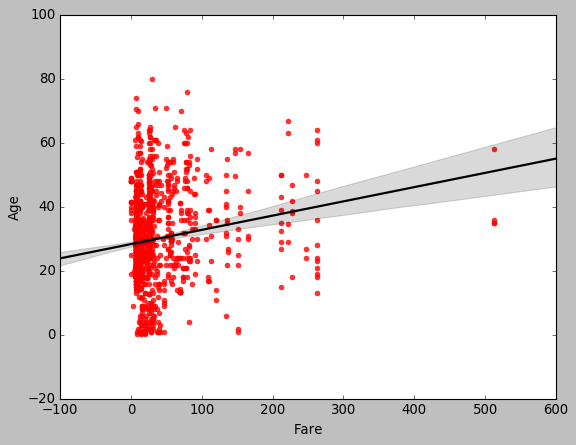

In [31]:
# Method 2 - seaborn
# your code here
sns.regplot(x, y, scatter_kws={"color": "red"}, line_kws={"color":"black", "lw": 2})
plt.show()

#### Plot the correlation matrix using seaborn.

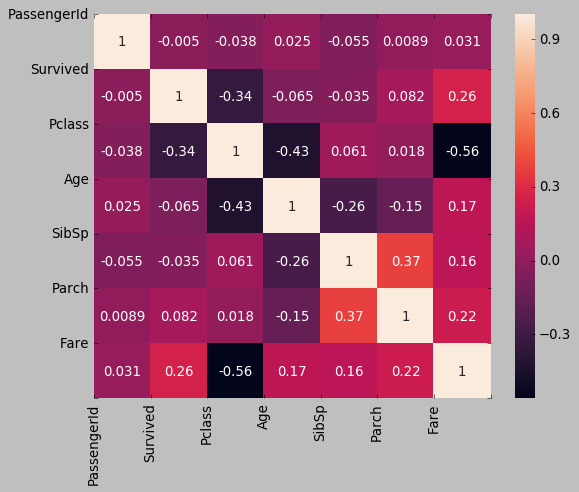

In [32]:
correlation = titanic.corr()
sns.heatmap(correlation, cmap = 'rocket', annot=True)
plt.xticks(range(8))
plt.yticks(range(8))
plt.show()

#### What are the most correlated features?

In [33]:
"""
According to the previous heatmap, the most correlated features are the passanger class and the ticket fare (which seems quite
obvious). Another correlation that seems remarkable is the relation between age and class, where we can see that passengers 
travelling in first class where actually older than the ones in lower classes. There seems to be also a moderate correlation 
between the people that survived and the passenger class, meaning that the higher passenger class, the more chances to survive.
"""

'\nAccording to the previous heatmap, the most correlated features are the passanger class and the ticket fare (which seems quite\nobvious). Another correlation that seems remarkable is the relation between age and class, where we can see that passengers \ntravelling in first class where actually older than the ones in lower classes. There seems to be also a moderate correlation \nbetween the people that survived and the passenger class, meaning that the higher passenger class, the more chances to survive.\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

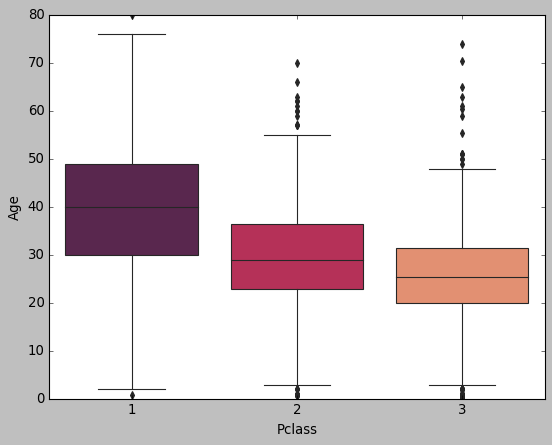

In [34]:
# your code here
age_vs_class = titanic[['Age', 'Pclass']]
age_vs_class = age_vs_class.dropna()
sns.boxplot(x="Pclass", y="Age", data=age_vs_class, palette="rocket")
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

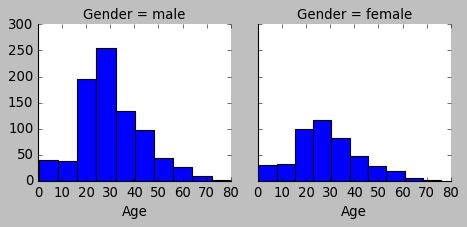

In [35]:
# your code here

g = sns.FacetGrid(titanic, col="Gender")
g.map(plt.hist, "Age")